# 05 Feature space

## TODO

- Sæt labels på x og y aksen

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fasttext

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

from tabulate import tabulate

In [102]:
data = pd.read_csv('./data/sklearn.csv')

model = fasttext.load_model('./data/fasttext_trained_model.bin')
data['vec'] = data['review'].apply(lambda x: model.get_sentence_vector(x))

In [103]:
def nearest_neighbours(*args):
    df_lists = []
    
    for arg in args:
        all_args_nearest_neighbours = model.get_nearest_neighbors(arg)       
        single_arg_list = []
        
        for k, v in all_args_nearest_neighbours: 
            single_arg_list.append(v)
        df_lists.append(single_arg_list)

    nearest_neighbours_df = pd.DataFrame(list(zip(*df_lists[0:])), columns=args)
    return nearest_neighbours_df

nearest_neighbours('skylder', 'nogenlunde', 'penge','løgn', 'trukket')

,skylder,nogenlunde,penge,løgn,trukket
0,skriver,holdte,trukket,bedt,penge
1,ca.,posen,dine,refunderer,betalte
2,træt,klokkeklare,jer.,Blot,ALDRIG
3,Skoene,printer,medarbejder,reklamation.,konto
4,gået,1/2.28/2,inkasso,OG,ringer
5,kundeservice,2/1,drive,Sikke,mails
6,samarbejdspartner,200,Ringer,forsendelsen,nummer
7,1-3,DER,via,snyde,dine
8,?,annullerer,ja,D.,TIL
9,uger,grundig,TIL,form,drive


In [104]:
kmeans = KMeans(n_clusters=5)
data['cluster'] = kmeans.fit_predict(data['vec'].values.tolist())

0    1553
3     798
1     751
2     391
4     146
Name: cluster, dtype: int64


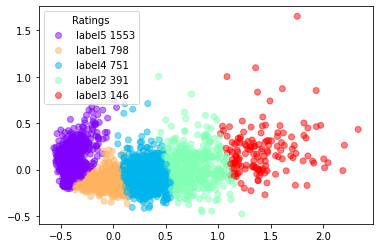

In [105]:
pca = PCA(n_components=3)
data['x'] = pca.fit_transform(data['vec'].values.tolist())[:,0]
data['y'] = pca.fit_transform(data['vec'].values.tolist())[:,1]
data['z'] = pca.fit_transform(data['vec'].values.tolist())[:,2]

scatter = plt.scatter(data['x'], data['y'], c=data['cluster'], cmap='rainbow', alpha=0.5)

# dc = data_cluster
# cc = cluster_colors
# cl = cluster_labels
print(data['cluster'].value_counts())
dc = data['cluster'].value_counts()
dc = -np.sort(-dc)
cc = data['cluster'].value_counts().index.tolist()

cl = []
for i in model.labels:
    cl.append(i.replace('__',''))

handles = scatter.legend_elements(num=cc)[0]  # extract the handles from the existing scatter plot

plt.legend(title='Ratings', handles=handles,  
           labels=[cl[0]+' '+str(dc[0]),
                   cl[1]+' '+str(dc[1]),
                   cl[2]+' '+str(dc[2]),
                   cl[3]+' '+str(dc[3]),
                   cl[4]+' '+str(dc[4])])

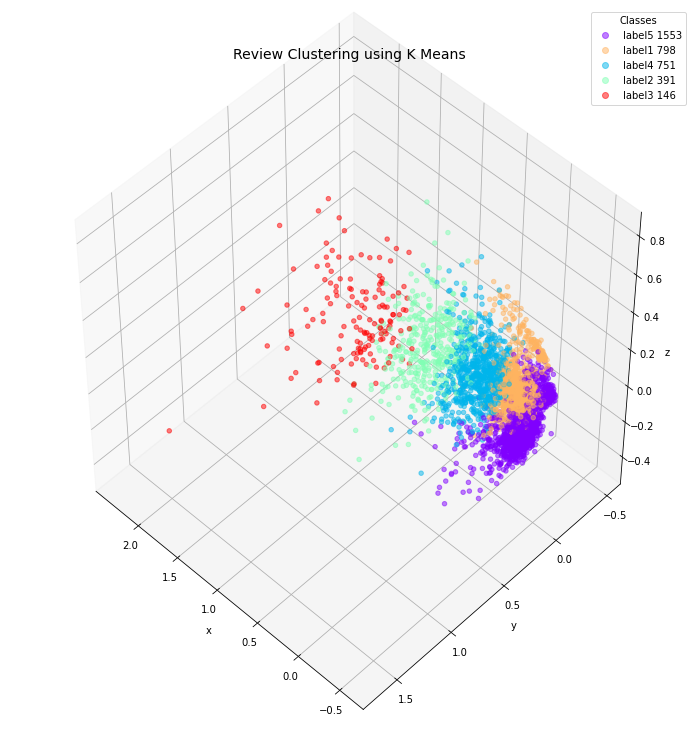

In [106]:
fig = plt.figure(1, figsize=(10,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(data['x'],data['y'],data['z'], c=data['cluster'], cmap='rainbow', alpha=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_facecolor('white')
plt.title("Review Clustering using K Means", fontsize=14)
plt.legend(title='Classes', handles=handles, 
           labels=[cl[0]+' '+str(dc[0]),
                   cl[1]+' '+str(dc[1]),
                   cl[2]+' '+str(dc[2]),
                   cl[3]+' '+str(dc[3]),
                   cl[4]+' '+str(dc[4])])